In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from IPython.display import Image
    
# アニメーションを書いてくれるクラス
class Logger:
    # f: 最適化したい関数
    # g: 導関数
    # x_range: 可視化したい範囲
    def __init__(self, f, g, x_range):
        self.frames = []
        self.fig, self.ax = plt.subplots(figsize=(8, 8))  # figとaxを生成
        self.f = f
        self.g = g
        self.x_range = x_range
        self.y_range = f(x_range).min() - 20, f(x_range).max() + 20
        self.bbox_args = dict(boxstyle="round", fc="0.8")
        self.arrow_args = dict(arrowstyle = '->', color = 'black', linewidth = 1)
        print('----------------------------')
        print('| iter |   x   |   f(x)   |')
        print('----------------------------')
    
    # (x_0, y_0)を通る接戦の方程式を返す
    def tangent_function(self, x_0, y_0):
        a = self.g(x_0)
        def tangent(x):
            return a * x + (y_0 - a * x_0)
        return tangent

    def capture(self, i, x):
        print(f'|{i:5d} | {x:.3f} | {self.f(x):.6f} |')
        self.ax.set_ylim(self.y_range)  
        
        y = self.f(x)
        
        f_plt = self.ax.plot(self.x_range, self.f(self.x_range), label='f(x)', color='blue')    
        tangent = self.tangent_function(x, y)
        tangent_plt = self.ax.plot([x - 3, x + 3], [tangent(x - 3), tangent(x + 3)], color='red', ls='--')
        point_plt = self.ax.scatter(x, y, label='x', color='red', marker='x', zorder = 10)    
        annotate_plt = self.ax.annotate(f'x = {x:.3f}, y = {self.f(x):.6f}', xy = (x, y), xytext = (0.7, 0.9), textcoords = 'axes fraction', bbox = self.bbox_args, arrowprops=self.arrow_args, fontsize = 12)
        title = self.ax.text(0.5, 1.01, f'iter: {i:3d}', ha='center', va='bottom', transform=self.ax.transAxes, fontsize=14)
        
        self.frames.append([f_plt[0], tangent_plt[0], point_plt, annotate_plt, title])
        
    def gif(self, to_file, fps):
        interval = 1000 / fps
        anim.ArtistAnimation(self.fig, self.frames, interval=interval).save(to_file)
        return anim.ArtistAnimation(self.fig, self.frames, interval=interval)
    
    
# gifをプレビューしてくれる
def preview(path):
    return Image(url=path)

In [3]:
def gradient_decent(f, g, n_iter, init, lr=0.1, x_range=np.linspace(-10, 10, 100)):
    logger = Logger(f, g, x_range)
    x = init
    for i in range(n_iter):
        x -= lr * g(x)
        logger.capture(i, x)
    return logger

In [4]:
def f(x):
    return x**2 + np.exp(-x)

In [5]:
def g(x):
    return 2 * x - np.exp(-x)

----------------------------
| iter |   x   |   f(x)   |
----------------------------
|    0 | 4.800 | 23.050607 |
|    1 | 3.841 | 14.774915 |
|    2 | 3.075 | 9.501595 |
|    3 | 2.465 | 6.159249 |
|    4 | 1.980 | 4.059144 |
|    5 | 1.598 | 2.755742 |
|    6 | 1.299 | 1.959247 |
|    7 | 1.066 | 1.481029 |
|    8 | 0.887 | 1.199152 |
|    9 | 0.751 | 1.035961 |
|   10 | 0.648 | 0.943024 |
|   11 | 0.571 | 0.890850 |
|   12 | 0.513 | 0.861909 |
|   13 | 0.470 | 0.846011 |
|   14 | 0.439 | 0.837344 |
|   15 | 0.415 | 0.832648 |
|   16 | 0.398 | 0.830115 |
|   17 | 0.386 | 0.828753 |
|   18 | 0.377 | 0.828023 |
|   19 | 0.370 | 0.827632 |
|   20 | 0.365 | 0.827423 |
|   21 | 0.361 | 0.827311 |
|   22 | 0.359 | 0.827252 |
|   23 | 0.357 | 0.827220 |
|   24 | 0.356 | 0.827203 |
|   25 | 0.354 | 0.827194 |
|   26 | 0.354 | 0.827189 |
|   27 | 0.353 | 0.827187 |
|   28 | 0.353 | 0.827186 |
|   29 | 0.353 | 0.827185 |


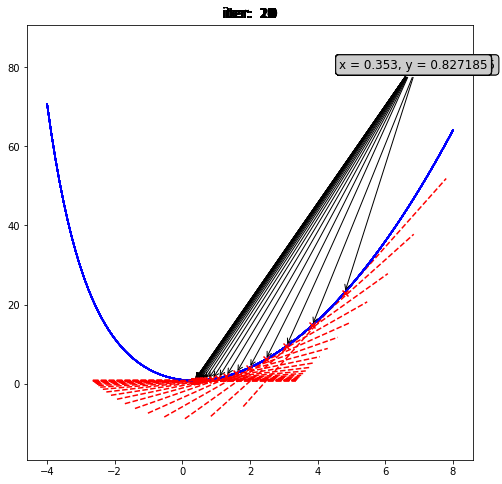

In [6]:
logger = gradient_decent(f, g, 30, 6, x_range=np.linspace(-4, 8, 100))

In [7]:
logger.gif("gradient.gif", fps=2)

In [8]:
preview('gradient.gif')

In [9]:
def f2(x):
    return (x ** 2) / 10 + 10 * np.sin((x**2 / 4)) 

In [10]:
def g2(x):
    return x / 5 + 5 * x * np.cos(x ** 2 / 4)

----------------------------
| iter |   x   |   f(x)   |
----------------------------
|    0 | 2.470 | 10.599512 |
|    1 | 2.417 | 10.523116 |
|    2 | 2.326 | 10.303986 |
|    3 | 2.177 | 9.737910 |
|    4 | 1.950 | 8.519396 |
|    5 | 1.647 | 6.547869 |
|    6 | 1.310 | 4.333590 |
|    7 | 0.999 | 2.570880 |
|    8 | 0.747 | 1.447396 |
|    9 | 0.555 | 0.799551 |
|   10 | 0.411 | 0.439001 |
|   11 | 0.304 | 0.240590 |
|   12 | 0.225 | 0.131779 |
|   13 | 0.167 | 0.072167 |
|   14 | 0.123 | 0.039520 |
|   15 | 0.091 | 0.021641 |
|   16 | 0.068 | 0.011851 |
|   17 | 0.050 | 0.006489 |
|   18 | 0.037 | 0.003554 |
|   19 | 0.027 | 0.001946 |


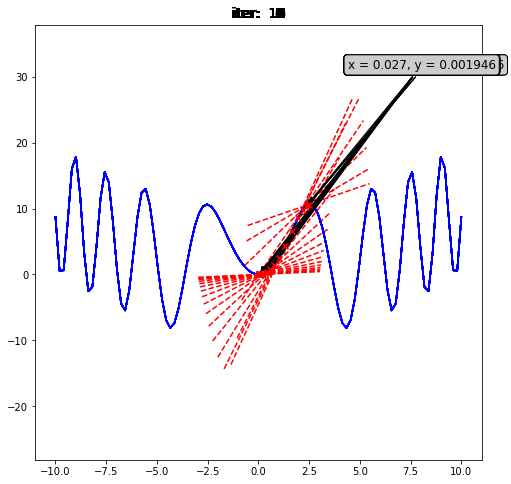

In [11]:
logger = gradient_decent(f2, g2, 20, 2.5, lr=0.05, x_range=np.linspace(-10, 10, 100))

In [12]:
logger.gif("gradient2.gif", fps=2)

In [13]:
preview('gradient2.gif')

In [14]:
def loss(a):
    n = len(x)
    s = 0
    for i in range(n):
        s += (y[i] - a * x[i])**2
    
    return s / n

In [15]:
def dloss(a):
    s = 0
    for i in range(n):
        s += -2 * x[i] * y[i] + 2 * a * x[i]**2
    
    return s / n

----------------------------
| iter |   x   |   f(x)   |
----------------------------
|    0 | -3.389 | 1233.821534 |
|    1 | -2.849 | 960.242415 |
|    2 | -2.374 | 747.418652 |
|    3 | -1.954 | 581.857939 |
|    4 | -1.584 | 453.064287 |
|    5 | -1.258 | 352.872614 |
|    6 | -0.970 | 274.931107 |
|    7 | -0.717 | 214.298539 |
|    8 | -0.493 | 167.131008 |
|    9 | -0.295 | 130.438254 |
|   10 | -0.121 | 101.894080 |
|   11 | 0.033 | 79.688882 |
|   12 | 0.168 | 62.414926 |
|   13 | 0.288 | 48.977101 |
|   14 | 0.393 | 38.523494 |
|   15 | 0.486 | 30.391382 |
|   16 | 0.568 | 24.065217 |
|   17 | 0.640 | 19.143942 |
|   18 | 0.704 | 15.315564 |
|   19 | 0.760 | 12.337376 |
|   20 | 0.810 | 10.020573 |
|   21 | 0.854 | 8.218276 |
|   22 | 0.892 | 6.816226 |
|   23 | 0.926 | 5.725537 |
|   24 | 0.956 | 4.877065 |
|   25 | 0.983 | 4.217018 |
|   26 | 1.006 | 3.703551 |
|   27 | 1.027 | 3.304113 |
|   28 | 1.045 | 2.993381 |
|   29 | 1.061 | 2.751654 |
|   30 | 1.075 | 2.563610 |
| 

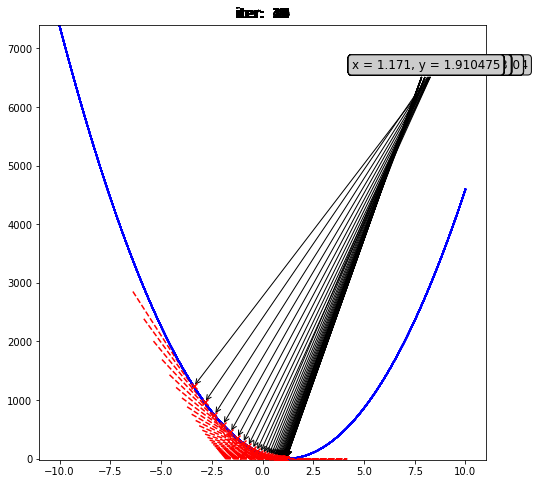

In [17]:
logger = gradient_decent(loss, dloss, 50, -4, lr=0.001, x_range=np.linspace(-10, 10, 100))

In [20]:
logger.gif("linreg.gif", fps=10)

In [21]:
preview("linreg.gif")